https://pyvrp.org/examples/quick_tutorial.html <- extended from tutorial at this link

In [116]:

import random
COORDS = []
DEMANDS = []
for i in range(random.randint(20, 30)): # general
    COORDS.append((random.randint(0, 1000),random.randint(0, 1000)))
    DEMANDS.append((random.randint(0,4), random.randint(0,4)))
for i in range(random.randint(30, 50)): # city center (cluster)
    x = random.randint(400, 600)
    y = random.randint(400 + abs(x - 500), 600 - abs(x - 500))
    COORDS.append((x,y))
    DEMANDS.append((random.randint(0,10), random.randint(0,10))) # pickups AND dropoffs



In [117]:
from pyvrp import Model

m = Model()
m.add_vehicle_type(20, capacity=30)
depot = m.add_depot(x=COORDS[0][0], y=COORDS[0][1])
clients = [
    m.add_client(x=COORDS[idx][0], y=COORDS[idx][1], pickup=DEMANDS[idx][0], delivery=DEMANDS[idx][1])
    for idx in range(1, len(COORDS)) 
]

locations = [depot] + clients # creates the complete graph between every point
for frm in locations:
    for to in locations:
        distance = abs(frm.x - to.x) + abs(frm.y - to.y) 
        m.add_edge(frm, to, distance=distance)


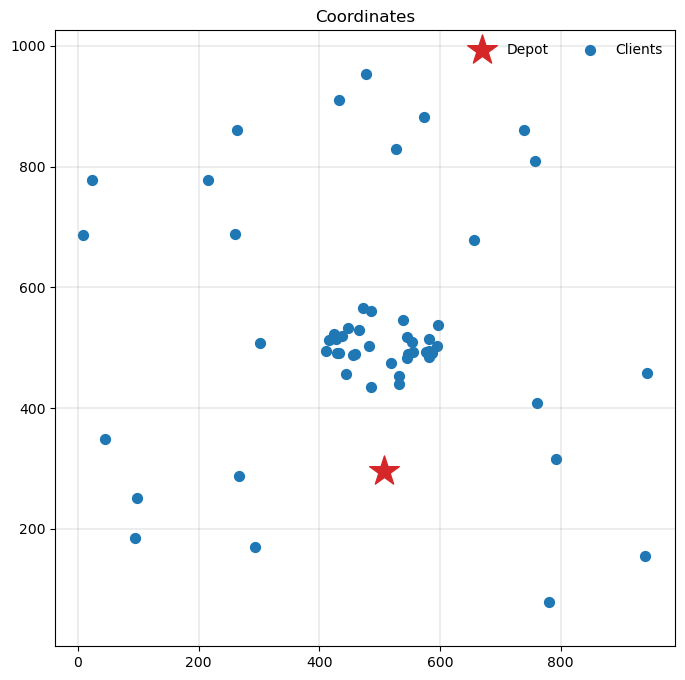

In [118]:
import matplotlib.pyplot as plt
import numpy as np

import pyvrp.plotting as vplt

from pyvrp.plotting import plot_coordinates
from pyvrp.plotting import plot_demands

_, ax = plt.subplots(figsize=(8, 8))

colors = np.array([i[0] for i in DEMANDS[1:]], dtype=np.int32) # show demand for pickups

plot_coordinates(m.data(), ax=ax)



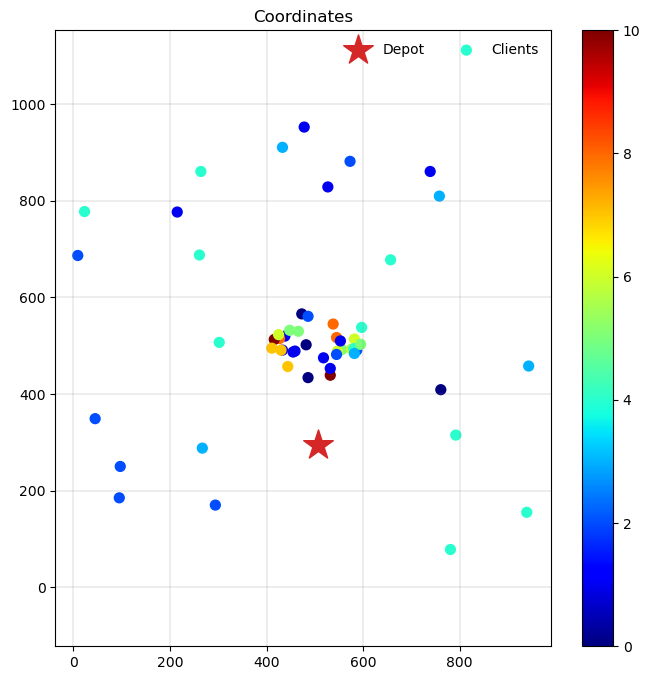

In [119]:
import matplotlib.pyplot as plt
import numpy as np

from pyvrp import ProblemData
fig, ax = plt.subplots(figsize=(8, 8))
def plot_coordinates(
    data: ProblemData,
    title: str = "Coordinates",
    ax: plt.Axes | None = None,
):
    """
    Plots coordinates for clients and depot.

    Parameters
    ----------
    data
        Data instance.
    title
        Title to add to the plot.
    ax
        Axes object to draw the plot on. One will be created if not provided.
    """
    if not ax:
        _, ax = plt.subplots()

    num_locs = data.num_locations
    x_coords = np.array([data.location(loc).x for loc in range(num_locs)])
    y_coords = np.array([data.location(loc).y for loc in range(num_locs)])

    # These are the depots
    kwargs = dict(c="tab:red", marker="*", zorder=3, s=500)
    ax.scatter(
        x_coords[: data.num_depots],
        y_coords[: data.num_depots],
        label="Depot",
        **kwargs,
    )
    
    test = ax.scatter(
        x_coords[data.num_depots :],
        y_coords[data.num_depots :],
        c=colors, ###
        cmap = "jet", ###

        s=50,
        label="Clients",
    )
    fig.colorbar(test)

    ax.grid(color="grey", linestyle="solid", linewidth=0.2)

    ax.set_title(title)
    ax.set_aspect("equal", "datalim")
    ax.legend(frameon=False, ncol=2)


plot_coordinates(m.data(), ax=ax)

In [120]:
from pyvrp.stop import MaxRuntime

res = m.solve(stop=MaxRuntime(20), display=True)  # 20 seconds


PyVRP v0.10.1

Solving an instance with:
    1 depot
    55 clients
    20 vehicles (1 vehicle type)

                  |       Feasible        |      Infeasible
    Iters    Time |   #      Avg     Best |   #      Avg     Best
H     500      3s |  59     9951     9226 |  50     7856     7534
     1000      8s |  42     9476     9226 |  50     8374     8170
     1500     11s |  27     9466     9226 |  52     8873     8701
     2000     14s |  44     9552     9226 |  54     8803     8701
H    2500     16s |  33     9410     9222 |  35     9067     8996

Search terminated in 20.00s after 2944 iterations.
Best-found solution has cost 9222.

Solution results
    # routes: 8
   # clients: 55
   objective: 9222
    distance: 9222
    duration: 0
# iterations: 2944
    run-time: 20.00 seconds



In [121]:
print(res)


Solution results
    # routes: 8
   # clients: 55
   objective: 9222
    distance: 9222
    duration: 0
# iterations: 2944
    run-time: 20.00 seconds

Routes
------
Route #1: 31 26 29 34 54 
Route #2: 28 51 35 49 38 45 42 
Route #3: 25 46 55 37 53 
Route #4: 40 43 
Route #5: 27 39 7 30 36 33 47 
Route #6: 21 19 8 22 10 12 4 5 16 1 15 
Route #7: 44 20 11 2 14 17 6 3 13 18 24 9 23 
Route #8: 50 41 48 52 32 



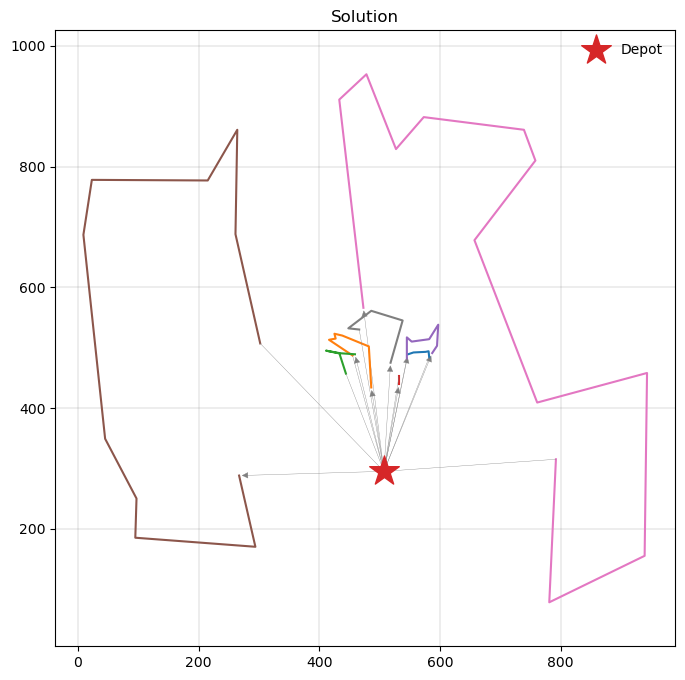

In [122]:
from pyvrp.plotting import plot_solution

_, ax = plt.subplots(figsize=(8, 8))
plot_solution(res.best, m.data(), ax=ax)
